In [1]:
#import packages
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Overview of the project

Through this project, we aim to build a prediction based model which classifies space objects.


The next step is to put the datasets in the jupyter notebook

In [2]:
#Acquiring the tables and putting them in data frames
amor_asteroids = pd.read_csv("amor-asteroids.csv")
apollo_asteroids = pd.read_csv("apollo-asteroids.csv")
aten_asteroids = pd.read_csv("aten-asteroids.csv")
atira_asteroids = pd.read_csv("atira-asteroids.csv")
centaur_objects = pd.read_csv("centaur-objects.csv")
comets = pd.read_csv("comets.csv")
hyperbolic_asteroids = pd.read_csv("hyperbolic-asteroids.csv")
inner_main_belt = pd.read_csv("inner-main-belt-asteroids.csv")
jupiter_trojan_asteroids = pd.read_csv("jupiter-trojan-asteroids.csv")
mars_crossin_asteroids = pd.read_csv("mars-crossing-asteroids.csv")
other_asteroids = pd.read_csv("other-asteroids.csv")
outer_main_belt_asteroids = pd.read_csv("outer-main-belt-asteroids.csv")
trans_neptunian_objects = pd.read_csv("trans-neptunian-objects.csv")

In [3]:
trans_neptunian_objects.head()

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,n_del_obs_used,n_dop_obs_used,H
0,15760 Albion (1992 QB1),44.32,0.0763,2.18,359.31,6.27,40.939,47.71,295.0,11075.0,3.0,96,NaN,NaN,7.18
1,15788 (1993 SB),39.66,0.3256,1.94,354.73,78.92,26.747,52.58,250.0,10335.0,2.0,126,NaN,NaN,7.96
2,15789 (1993 SC),39.85,0.1868,5.15,354.53,319.41,32.404,47.29,252.0,9614.0,2.0,146,NaN,NaN,7.09
3,15807 (1994 GV9),43.49,0.0610,0.57,176.95,299.37,40.841,46.15,287.0,9540.0,3.0,61,NaN,NaN,7.32
4,15809 (1994 JS),42.28,0.2183,14.06,56.44,238.15,33.049,51.51,275.0,2259.0,4.0,38,NaN,NaN,7.64


In [4]:
asteroid_frames = [amor_asteroids, apollo_asteroids, aten_asteroids, atira_asteroids, centaur_objects, 
                   hyperbolic_asteroids, inner_main_belt, jupiter_trojan_asteroids, mars_crossin_asteroids, other_asteroids,
                   outer_main_belt_asteroids, trans_neptunian_objects]
asteroids = pd.concat(asteroid_frames)

In [5]:
asteroids

,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,n_del_obs_used,n_dop_obs_used,H
0,433 Eros (A898 PA),1.458,0.2228,10.83,304.29,178.91,1.133,1.78,1.76,46582.0,0.0,9130,4.0,2.0,10.41
1,719 Albert (A911 TB),2.636,0.5470,11.58,183.85,156.23,1.194,4.08,4.28,40483.0,0.0,2044,NaN,NaN,15.59
2,887 Alinda (A918 AA),2.472,0.5709,9.40,110.42,350.47,1.061,3.88,3.89,38506.0,0.0,3064,NaN,NaN,13.88
3,1036 Ganymed (A924 UB),2.666,0.5329,26.69,215.50,132.48,1.245,4.09,4.35,36088.0,0.0,9806,0.0,1.0,9.26
4,1221 Amor (1932 EA1),1.919,0.4357,11.88,171.32,26.65,1.083,2.76,2.66,33431.0,0.0,619,NaN,NaN,17.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,(2023 DP5),92.910,0.9483,118.36,305.64,197.11,4.800,181.03,896.00,134.0,4.0,49,NaN,NaN,14.50
4474,(2023 FV47),51.500,0.1004,2.62,48.23,139.14,46.325,56.67,370.00,6.0,9.0,6,NaN,NaN,7.20
4475,(A/2023 H4),141.200,0.9850,76.62,230.81,64.90,2.119,280.35,1680.00,142.0,NaN,69,NaN,NaN,18.09
4476,(2023 QE7),80.290,0.9612,102.87,169.44,198.23,3.119,157.46,719.00,55.0,4.0,24,NaN,NaN,16.88


In [6]:
asteroids = asteroids.drop(columns=['condition_code','n_del_obs_used','n_dop_obs_used', 'full_name','H']) #drops useless columns or full of NaN values

In [7]:
asteroids

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used
0,1.458,0.2228,10.83,304.29,178.91,1.133,1.78,1.76,46582.0,9130
1,2.636,0.5470,11.58,183.85,156.23,1.194,4.08,4.28,40483.0,2044
2,2.472,0.5709,9.40,110.42,350.47,1.061,3.88,3.89,38506.0,3064
3,2.666,0.5329,26.69,215.50,132.48,1.245,4.09,4.35,36088.0,9806
4,1.919,0.4357,11.88,171.32,26.65,1.083,2.76,2.66,33431.0,619
...,...,...,...,...,...,...,...,...,...,...
4473,92.910,0.9483,118.36,305.64,197.11,4.800,181.03,896.00,134.0,49
4474,51.500,0.1004,2.62,48.23,139.14,46.325,56.67,370.00,6.0,6
4475,141.200,0.9850,76.62,230.81,64.90,2.119,280.35,1680.00,142.0,69
4476,80.290,0.9612,102.87,169.44,198.23,3.119,157.46,719.00,55.0,24


In [8]:
# classification = np.zeros(144949)
# temp = np.ones(3888)
# classification = np.append(classification, temp) #created classification column for the objects: 0 if it's an asteroid, 1 if it's a comet

In [9]:
classification_comets = comets.drop(columns=['full_name','A1','A2','A3','DT','class','tp_cal','two_body', 'condition_code','n_del_obs_used','n_dop_obs_used', 'H'])
# dropping useless columns, columns full of NaNs, and columns that asteroids do not have

In [10]:
classification_comets

,e,q,i,om,w,ad,per_y,data_arc,n_obs_used,a
0,0.9679,0.575,162.19,59.11,112.26,35.28,75.90,57852.0,8548.0,17.930
1,0.8483,0.336,11.78,334.56,186.56,4.09,3.30,5157.0,3143.0,2.215
2,0.7513,0.879,13.22,250.67,221.66,6.19,6.65,NaN,26.0,3.535
3,0.5845,1.578,8.16,194.80,205.99,6.02,7.40,3593.0,3562.0,3.798
4,0.8098,0.590,29.38,102.97,14.95,5.61,5.46,NaN,127.0,3.101
...,...,...,...,...,...,...,...,...,...,...
3883,0.3693,3.508,19.73,83.27,243.01,7.62,13.10,92.0,81.0,5.563
3884,0.2794,3.929,7.59,296.30,320.69,6.98,12.70,921.0,903.0,5.453
3885,0.9961,0.225,132.48,66.83,116.30,114.33,433.00,232.0,477.0,57.280
3886,0.9984,3.569,149.31,62.54,144.39,4476.72,106000.00,57.0,106.0,2240.000


In [11]:
# a_mean = asteroids.mean()
# asteroids.fillna(a_mean,inplace=True)
# c_mean = classification_comets.mean()
# classification_comets.fillna(c_mean,inplace=True) #replacing NaN values in each set

In [12]:
# space_objects = pd.concat([asteroids, classification_comets]) #putting them together for feature evaluation

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

In [14]:
# sel = SelectKBest(mutual_info_classif, k=3) #best three features picked, change k value if you believe the extra features may be benefit the model
# sel.fit(space_objects, classification)
# sel.scores_
# May want to consider if we want to use features with above 0.04 score, though that would be 7 total features

In [15]:
# transformed_space_objects = sel.transform(space_objects) #drops corresponding columns, may want to use this one for training model, I think

In [16]:
asteroids = asteroids.head(3000)
comets = comets.head(3000)


from sklearn.model_selection import train_test_split

classification = np.zeros(3000)
temp = np.ones(3000)
classification = np.append(classification, temp) #created classification column for the objects: 0 if it's an asteroid, 1 if it's a comet

classification_comets = comets.drop(columns=['full_name','A1','A2','A3','DT','class','tp_cal','two_body', 'condition_code','n_del_obs_used','n_dop_obs_used', 'H'])
#dropping useless columns, columns full of NaNs, and columns that asteroids do not have


a_mean = asteroids.mean()
asteroids.fillna(a_mean,inplace=True)
c_mean = classification_comets.mean()
classification_comets.fillna(c_mean,inplace=True) #replacing NaN values in each set

space_objects = pd.concat([asteroids, classification_comets]) #putting them together for feature evaluation

sel = SelectKBest(mutual_info_classif, k=3) #best three features picked, change k value if you believe the extra features may be benefit the model
sel.fit(space_objects, classification)
sel.scores_
# May want to consider if we want to use features with above 0.04 score, though that would be 7 total features

transformed_space_objects = sel.transform(space_objects) #drops corresponding columns, may want to use this one for training model, I think

X_train, X_test, y_train, y_test = train_test_split(transformed_space_objects, classification, test_size=0.3,random_state=109) # 70% training and 30% test

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labeled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

/var/folders/z6/64mdg5mn37xbbb64s8sqfl_80000gn/T/ipykernel_3341/3997071000.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asteroids.fillna(a_mean,inplace=True)


Accuracy: 0.9722222222222222
Precision: 0.9732558139534884
Recall: 0.96875


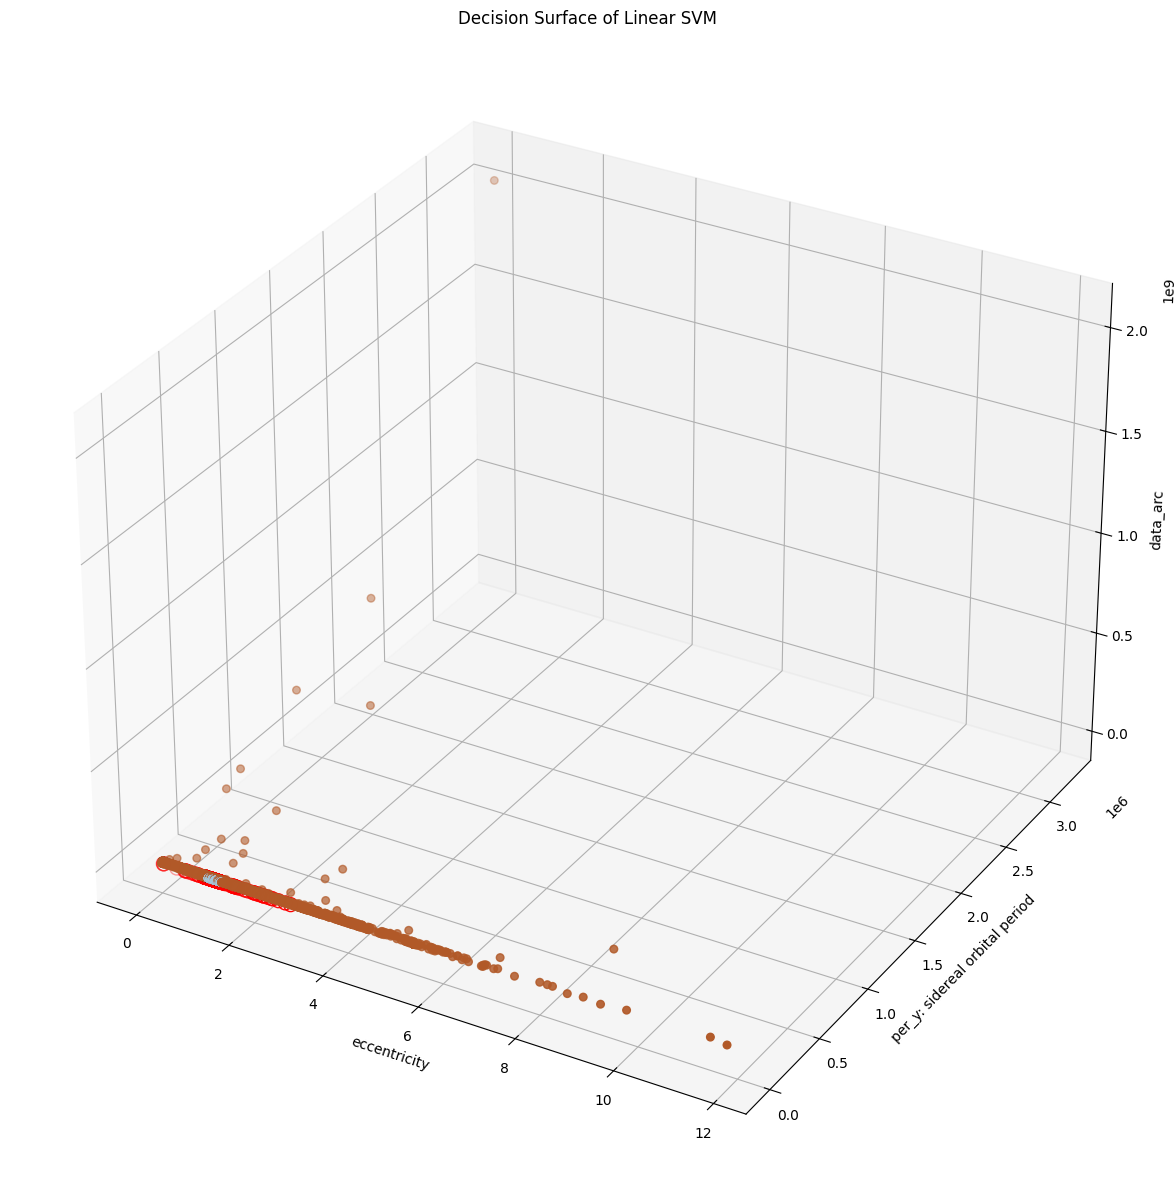

In [17]:
# Create the meshgrid for visualization
x_min, x_max = transformed_space_objects[:, 0].min() - 1, transformed_space_objects[:, 0].max() + 1
y_min, y_max = transformed_space_objects[:, 1].min() - 1, transformed_space_objects[:, 1].max() + 1
z_min, z_max = transformed_space_objects[:, 2].min() - 1, transformed_space_objects[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50),
                         np.linspace(z_min, z_max, 50))

# Get the decision function values
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])

# Reshape Z to match the 3D grid
Z = Z.reshape(xx.shape)

# Choose a threshold (epsilon) for identifying points near the decision boundary
epsilon = 0.05

# Create a mask for the points that are close to the decision boundary
near_boundary = np.abs(Z) < epsilon


fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Only plot the boundary points
boundary_points_x = xx[near_boundary]
boundary_points_y = yy[near_boundary]
boundary_points_z = zz[near_boundary]

ax.scatter(boundary_points_x, boundary_points_y, boundary_points_z, c='black', alpha=0.5)

# Plot the original data points
scatter = ax.scatter(transformed_space_objects[:, 0], transformed_space_objects[:, 1], transformed_space_objects[:, 2], 
                     c=classification, cmap=plt.cm.Paired, s=30)

# Highlight support vectors
support_vectors = clf.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2], 
           facecolors='none', edgecolors='r', s=100)

ax.set_title("Decision Surface of Linear SVM")

# Labeling the axes
ax.set_xlabel('eccentricity')
ax.set_ylabel('per_y: sidereal orbital period')
ax.set_zlabel('data_arc')

plt.show()

In [19]:
#builds array with the classification column
temp = []
for i in range(len(transformed_space_objects)):
    object = transformed_space_objects[i]
    object = np.append(object, classification[i])
    temp.append(object)
temp = np.array(temp)
transformed_space_objects = temp

In [20]:
transformed_space_objects

array([[1.13300000e+00, 1.78000000e+00, 1.76000000e+00, 0.00000000e+00],
       [1.19400000e+00, 4.08000000e+00, 4.28000000e+00, 0.00000000e+00],
       [1.06100000e+00, 3.88000000e+00, 3.89000000e+00, 0.00000000e+00],
       ...,
       [7.00000000e-03, 1.20567191e+04, 4.54193559e+06, 1.00000000e+00],
       [5.00000000e-03, 1.20567191e+04, 4.54193559e+06, 1.00000000e+00],
       [5.00000000e-03, 1.20567191e+04, 4.54193559e+06, 1.00000000e+00]])

First column is e, second column is per_y, third column is data_arc, and fourth column is 0 if asteroid else 1 if comet

In [21]:
X = pd.DataFrame(data=transformed_space_objects)[[0, 1, 2]].rename(columns={0: 'e', 1:'per_y', 2:'data_arc'})
X.head()

,e,per_y,data_arc
0,1.133,1.78,1.76
1,1.194,4.08,4.28
2,1.061,3.88,3.89
3,1.245,4.09,4.35
4,1.083,2.76,2.66


In [22]:
Y = pd.DataFrame(data=transformed_space_objects)[[3]]
Y.head()

,3
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
